# Instalar Theano

In [1]:
!pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

  Cloning git://github.com/Theano/Theano.git to c:\users\oriol\appdata\local\temp\pip-req-build-agbfk9k8
  Created wheel for Theano: filename=Theano-1.0.5+4.gc5abd7b69-py3-none-any.whl size=2681445 sha256=92221b565ceaa2dd07583d7df6cc04c56feb70c138a14ac9cefb2215ceabc74f
  Stored in directory: C:\Users\Oriol\AppData\Local\Temp\pip-ephem-wheel-cache-lywx24jn\wheels\8b\00\4b\8447c44e506676c90f88cce84840acfef30bace41499422025
Successfully built Theano


  Running command git clone -q git://github.com/Theano/Theano.git 'C:\Users\Oriol\AppData\Local\Temp\pip-req-build-agbfk9k8'


# Importar librerías

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el dataset

In [4]:
dataset = pd.read_csv('A:/a_Google Drive/01_Oriol/01_Machine Learning/05_deeplearning-az-master/datasets/Part 4 - Self Organizing Maps (SOM)/Credit_Card_Applications.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


# Escalado de características

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Entrenar el SOM

In [7]:
import sys
sys.path.append('A:/a_Google Drive/01_Oriol/01_Machine Learning/05_deeplearning-az-master/datasets/Part 4 - Self Organizing Maps (SOM)')

from minisom import MiniSom

som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizar los resultados

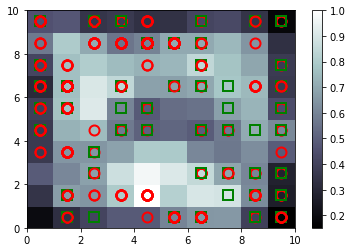

In [8]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5,
         markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', 
         markersize = 10, markeredgewidth = 2)
show()

# Determinar los fraudes

In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate( (mappings[(6,1)], mappings[(7,8)]), axis = 0 )
frauds = sc.inverse_transform(frauds)